### Dataset Description
    - Pregnancies: Number of times pregnant
    - Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    - BloodPressure: Diastolic blood pressure (mm Hg)
    - SkinThickness: Triceps skin fold thickness (mm)
    - Insulin: 2-Hour serum insulin (mu U/ml)
    - BMI: Body mass index (weight in kg/(height in m)^2)
    - DiabetesPedigreeFunction: Diabetes pedigree function
    - Age: Age (years)
    - Outcome: Class variable (0 or 1)
    - Dataset Link : https://www.kaggle.com/datasets/mathchi/diabetes-data-set/code

In [1]:
#Import Libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd # For data cleaning
import pickle # Creating and Loading Model
import numpy as np # Numerical Methods
from sklearn.linear_model import LogisticRegression # ML Algo
from sklearn.metrics import accuracy_score # For Checking Accuracy
from sklearn.model_selection import train_test_split # Splitting Data For Train Test
from sklearn import tree # ML Algo Decision Tree
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier # ML Algo Random Forest
from sklearn.neighbors import KNeighborsClassifier # ML Algo KNN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import Data
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Applying Some EDA

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

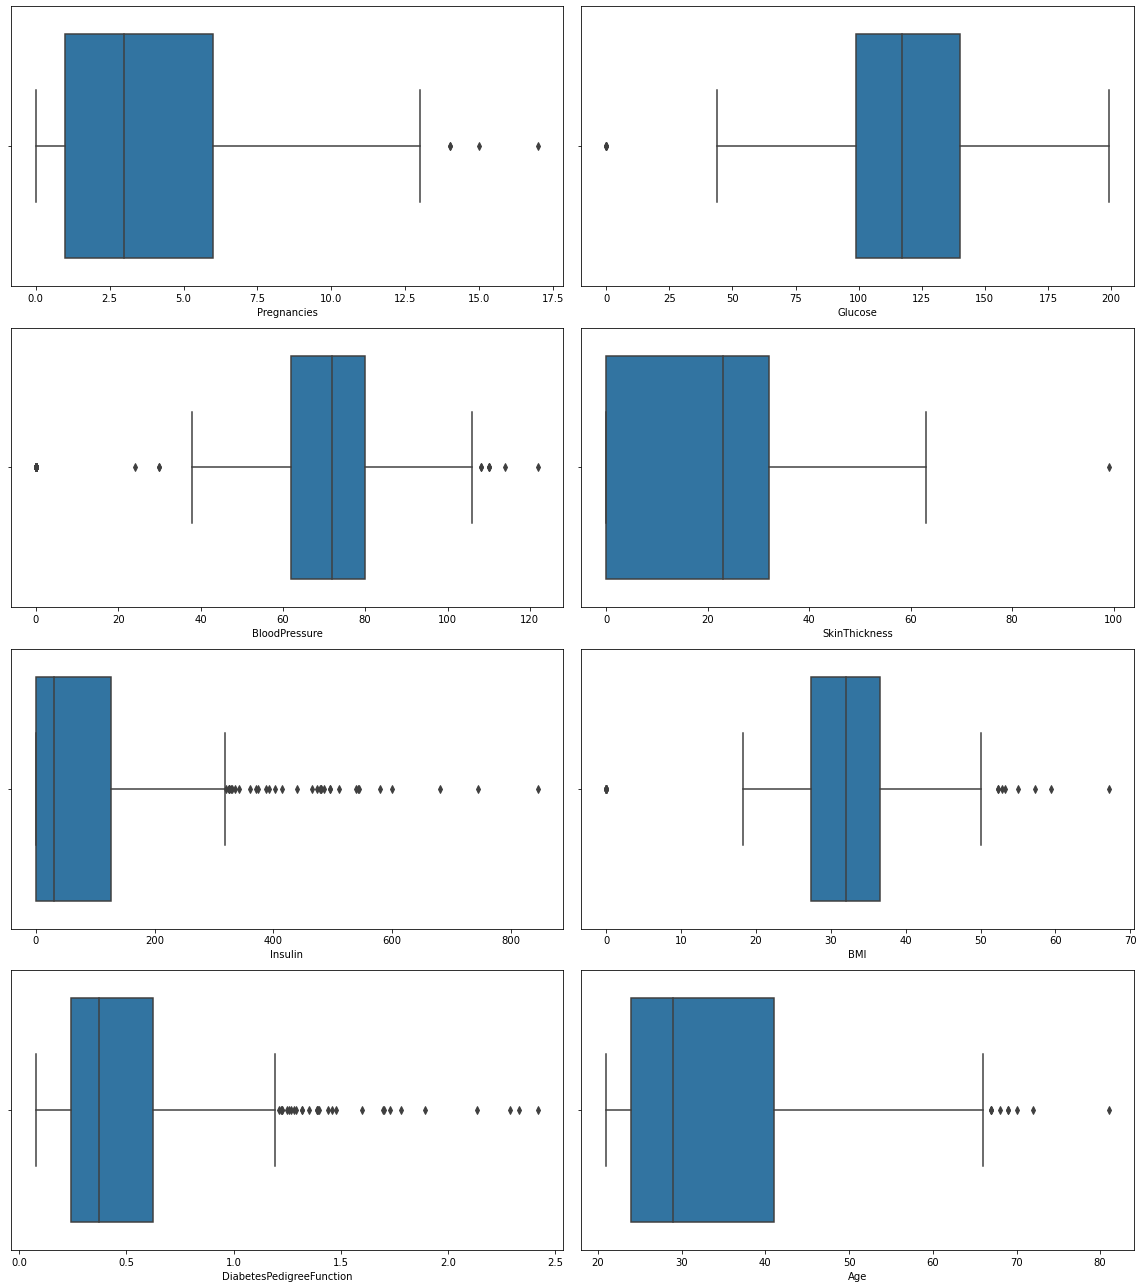

In [10]:
fig, ax = plt.subplots(4, 2, figsize=(16,18))
axes_list = [axes for axes_row in ax for axes in axes_row]
column_list = list(df.columns)

for i, col in enumerate(column_list[:-1]):
    sns.boxplot(data=df, x=col, ax=axes_list[i])

plt.tight_layout()
plt.show()

In [11]:
lst = list(df.columns)
del lst[-1]
print(lst)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [12]:
for i in lst:
    for x in [i]:
        q75,q25 = np.percentile(df.loc[:,x],[75,25])
        intr_qr = q75-q25

        max = q75+(1.5*intr_qr)
        min = q25-(1.5*intr_qr)

        df.loc[df[x] < min,x] = np.nan
        df.loc[df[x] > max,x] = np.nan

    df[i].fillna(df[i].mean(), inplace=True)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

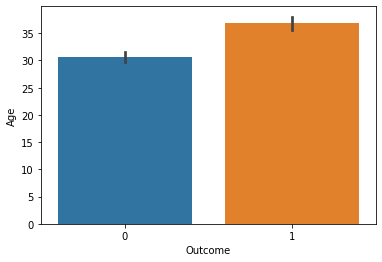

In [13]:
sns.barplot(df['Outcome'], df['Age'])

In [14]:
# Separating Target & Other Columns
X = df.drop(columns=['Outcome'])
y = df['Outcome']

In [16]:
# Training Testing (Split Data 80% 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
# Decision Tree
modelDT = tree.DecisionTreeClassifier()
resultDT = modelDT.fit(X_train, y_train);
prediction_test = modelDT.predict(X_test)
accuracyDT = metrics.accuracy_score(y_test, prediction_test)
# print()
# print ("Model Accuracy (Decision Tree):" "\n", accuracyDT)

# Random Forest
modelRF = RandomForestClassifier()
resultRF = modelRF.fit(X_train, y_train)
prediction_test = modelRF.predict(X_test)
accuracyRF = metrics.accuracy_score(y_test, prediction_test)
# print("Model Accuracy (Random Forest):" "\n", accuracyRF)

# KNN
modelKNN = KNeighborsClassifier(n_neighbors=3)
resultKNN = modelKNN.fit(X_train, y_train)
prediction_test = modelKNN.predict(X_test)
accuracyKNN = metrics.accuracy_score(y_test, prediction_test)
# print("Model Accuracy (KNN):" "\n", accuracyKNN)

# SVM
modelSVM = SVC()
resultSVM = modelSVM.fit(X_train, y_train);
prediction_test = modelSVM.predict(X_test)
# Print the prediction accuracy
accuracySVM = metrics.accuracy_score(y_test, prediction_test)
# print("Model Accuracy (SVM):" "\n", accuracySVM)

# LR
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracyLR = accuracy_score(y_test, prediction_test)
# print ("Accuracy : ", accuracy_score(y_test, prediction_test))

In [18]:
dct = {
    'Models': ['Decision Tree', 'Random Forest', 'KNN', 'SVM', 'Logistic Regression'],
    'Accuracy Scores': [accuracyDT, accuracyRF, accuracyKNN, accuracySVM, accuracyLR]
}

modelsDF = pd.DataFrame(dct)

In [19]:
modelsDF

,Models,Accuracy Scores
0,Decision Tree,0.675325
1,Random Forest,0.727273
2,KNN,0.733766
3,SVM,0.779221
4,Logistic Regression,0.779221
